# Baseline corrections

This tutorial shows how to make baseline corrections with **SpectroChemPy** using the
`Baseline`class processor - which allows performing all the implemented correction
operations with a maximum of flexibility and settings - or using equivalent
SpectroChemPy API or NDDataset methods which allow performing specific corrections
operations in a more direct way.

As prerequisite,
the user is expected to have read the [Import](../importexport/import.rst)
and [Import IR](../importexport/importIR.rst) tutorials.

We first import spectrochempy

In [1]:
import spectrochempy as scp

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAA AXNSR0IArs4c6QAAAAlwSFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAA ADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4w Ij4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1z eW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0 aWZmPSJodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRv b2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3Jl YXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6T3JpZW50YXRpb24+CiAg ICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAM NmktMZFoJTYVLVQ0smsy26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbD V0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1es SOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8+/CbqdfUvmsx1PuMgc2b Nxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivP j76UPZnssBN+wbM9Aet/AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vp qCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl 5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIXnD85wbkMmKK+U045Dtdi 8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcI QBymJFMkOlN8Dqjpg0XYTx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwI o4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+CxjtOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVw LY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2nEOHo0LVxHCpuxabJJdhi 5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl 2DN0Hqs/70Cx6hBCvESFUY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjp RKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSOhrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDT xE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cqanjmko+ndlb1UR3s6K8J lfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ 7+O0vZA4X8QmOQWjlSK7RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oP ET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs+PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZ k56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfMoXatZbu6G0h4VG+ibqq0 IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkL zS389YtNPXc/PH8l8ONBJZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE /3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3bIhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQA AAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.8.1©Copyright 2014-2025 - A.Travert & C.Fernandez @ LCS


Then we load a FTIR series of spectra on which we will demonstrate theprocessor capabilities

Running on GitHub Actions
MPL Configuration directory: /home/runner/.config/matplotlib
Stylelib directory: /home/runner/.config/matplotlib/stylelib


<Matplotlib Axes object>

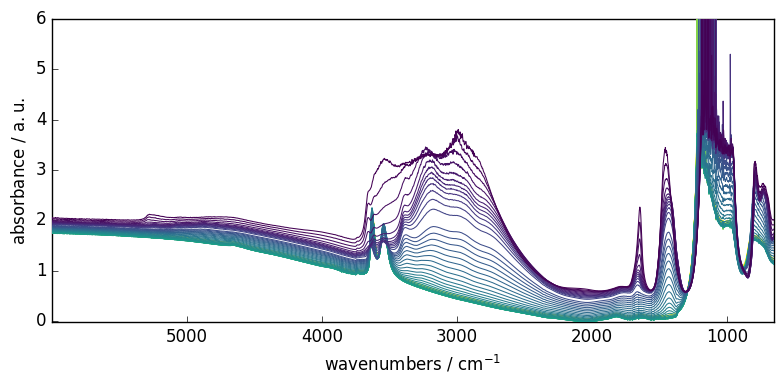

In [2]:
# loading
X = scp.read("irdata/nh4y-activation.spg")
# set figsize preference
prefs = scp.preferences
prefs.figure.figsize = (8, 4)
# plot the spectra
X.plot()

## The `Baseline` processor

The `Baseline` class processor proposes several algorithms (models) for Baseline determination.

- `detrend` : Remove polynomial trend along a dimension from dataset.
- `polynomial` : Perform a polynomial interpolation on pretermined regions
- `asls` : Perform an Asymmetric Least Squares Smoothing baseline correction.
- `snip` : Perform a Simple Non-Iterative Peak (SNIP) detection algorithm.
- `rubberband` : Perform a Rubberband baseline correction.

### How it works?

Basically, determining a correct `baseline`, belongs to the decomposition type methods (See `Analysis`):

The sequence of command is thus quite similar:

1) Initialize an instance of the processor and set the models parameters
2) Fit the model on a given dataset to extract a `baseline`.
3) Transform the original spectra by subtracting the determined baseline.

### Example
Let's fit a simple `rubberband` correction model. This is actually the only model in SpectroChemPy which is fully automatic (no parameter).


<Matplotlib Axes object>

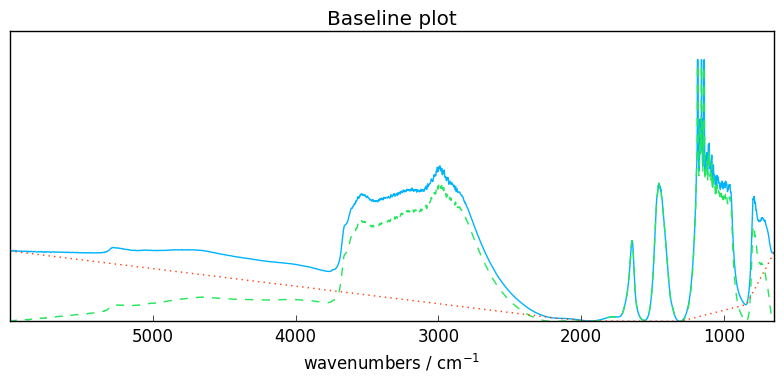

In [3]:
# instance initalisation and model selection
blc = scp.Baseline()
blc.model = "rubberband"
# model can also be passed as a parameter
blc = scp.Baseline(model="rubberband")
# fit the model on the first spectra in X (index:0)
blc.fit(X[0])
# get the new dataset with the baseline subtracted
X1 = blc.transform()
# plot X, X1 and the baseline using the processor plot method
blc.plot()

One can also use the property `corrected` instead of the method `transform()`,
both giving equivalent results.

In [4]:
X1 = blc.corrected

Of course, we can also apply the model to the complete series sequentially

<Matplotlib Axes object>

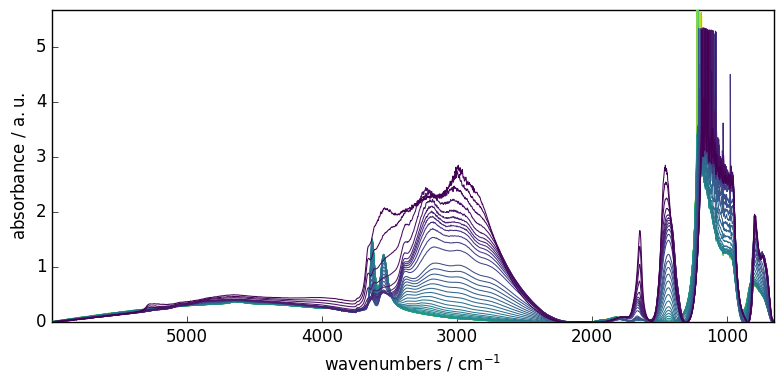

In [5]:
# fit the model on the full X series
blc.fit(X)
# get the new dataset with the baseline subtracted
X2 = blc.transform()
# plot the baseline corrected series of spectra
X2.plot()

The baseline models implemented in SpectroChemPy are able to handle missing data.

For instance, let's condider masking the saturated region of the spectra.

<Matplotlib Axes object>

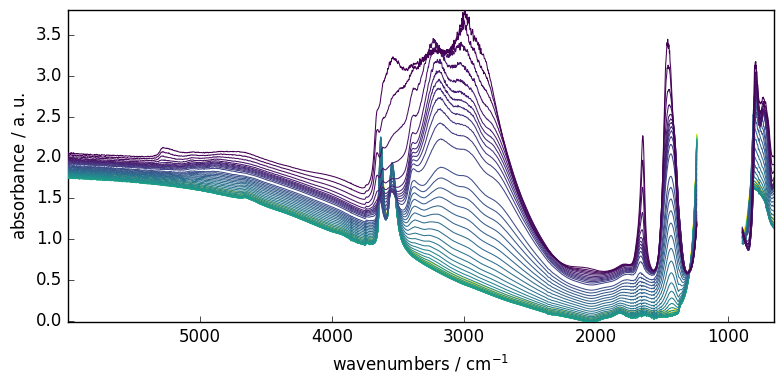

In [6]:
X[:, 891.0:1234.0] = scp.MASKED
X.plot()

Fitting the baseline is done transparently

<Matplotlib Axes object>

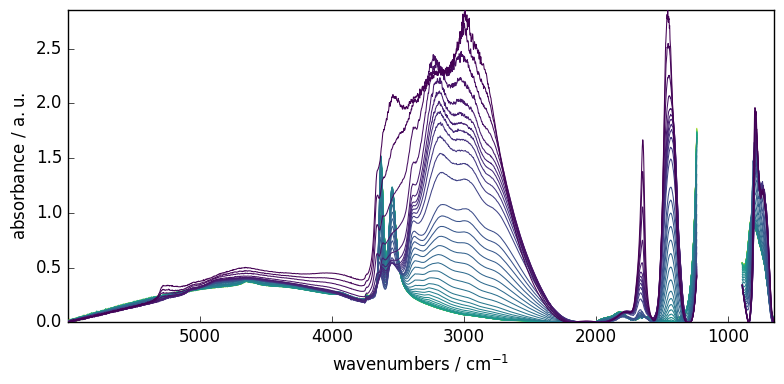

In [7]:
blc.fit(X)
X3 = blc.transform()
X3.plot()

### Overview of the other model

#### Polynomial
With this model, a polynomial is fitted using range of coordinate which are considered as belonging to the baseline.

- The first step is then to select the various regions that we expect to belong to
  the baseline.
- Then the degree of the polynomial is set (using the `order` parameters).
  A special cas is encountered, if `order` is set to "pchip". In this case a piecewise cubic hermite interpolation
  is performed in place of the classic polynomial interpolation.

**Range selection**

Each spectral range is defined by a list of two values indicating the limits of the
spectral ranges, e.g. `[4500.,
3500.]` to
select the 4500-3500 cm$^{-1}$ range. Note that the ordering has no importance and
using `[3500.0, 4500.]` would
lead to exactly the same result. It is also possible to formally pick a single
wavenumber `3750.`.

In [8]:
ranges = (
    [5900.0, 5400.0],
    4550.0,
    [4230.0, 4330.0],
    3780,
    [2100.0, 2000.0],
    [1550.0, 1555.0],
    1305.0,
    840.0,
)

**Polynomial of degree: order**

In this case, the base methods used for the interpolation are those of the
[polynomial module](
https://numpy.org/doc/stable/reference/routines.polynomials.polynomial.html)
of spectrochempy, in particular the
[numpy.polynomial.polynomial.polyfit()](
https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html#numpy.polynomial.polynomial.polyfit)
method.

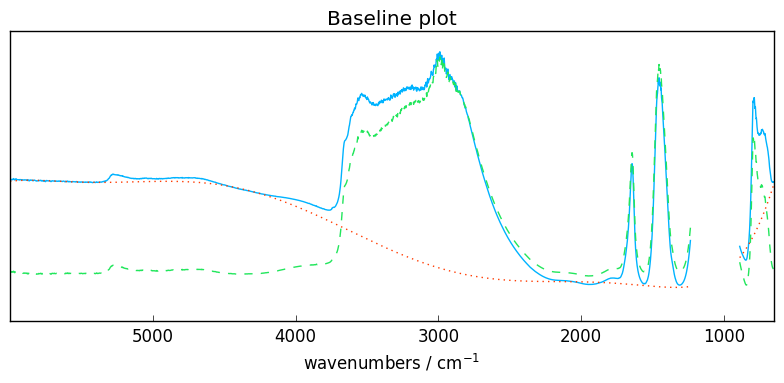

In [9]:
# set the model
blc.model = "polynomial"
# set the polynomial order
blc.order = 7
# set the ranges
blc.ranges = ranges
# fit the model on the first spectra X[0]
blc.fit(X[0])
# get and plot the corrected dataset
X4 = blc.transform()
ax = blc.plot()

The method `show_regions` can be used to display the regions used for the baseline

In [10]:
blc.show_regions(ax)

To examine which ranges has been used, use the `used_ranges` attribute. Note, the
extrema have been automatically added.

In [11]:
blc.used_ranges

[[np.float64(649.904), np.float64(651.832)],
 [840.0, 840.0],
 [1305.0, 1305.0],
 [1550.0, 1555.0],
 [2000.0, 2100.0],
 [3780.0, 3780.0],
 [4230.0, 4330.0],
 [4550.0, 4550.0],
 [5400.0, 5900.0],
 [np.float64(5997.627), np.float64(5999.556)]]

**Polynomial and pchip interpolation**

An interpolation using cubic Hermite spline interpolation can be used:
`order='pchip'` (`pchip` stands for **P**iecewise **C**ubic **H**ermite **I**nterpolating **P**olynomial).

This option triggers the use of
[scipy.interpolate.PchipInterpolator()](
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html)
to which we refer the interested readers.

<Matplotlib Axes object>

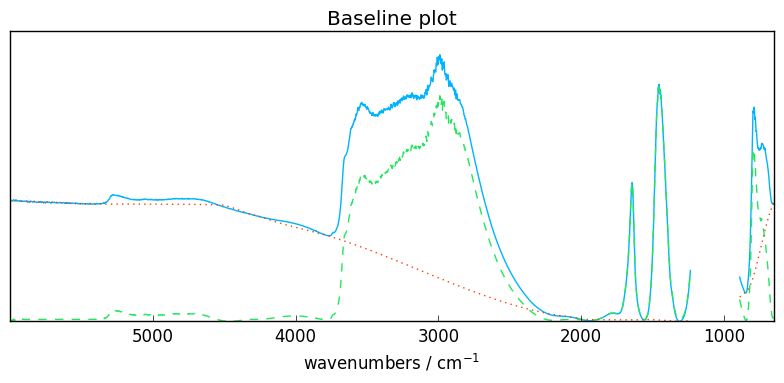

In [12]:
# set the polynomial order to 'pchip'
blc.order = "pchip"
# fit the model on the first spectra X[0]
blc.fit(X[0])
# get and plot the corrected dataset
X5 = blc.transform()
blc.plot()

**AsLS :  Asymmetric Least Squares Smoothing baseline correction**

Example:

<Matplotlib Axes object>

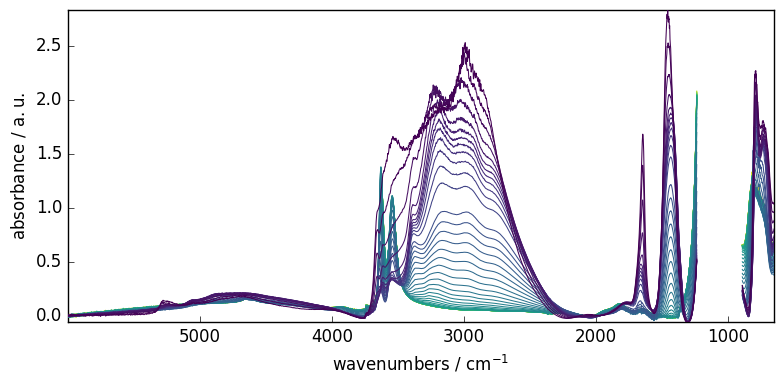

In [13]:
blc.model = "asls"
blc.lamb = 10**9
blc.asymmetry = 0.002
blc.fit(X)
X6 = blc.transform()
X6.plot()

**SNIP : Perform a Simple Non-Iterative Peak (SNIP) detection algorithm**

Example:

<Matplotlib Axes object>

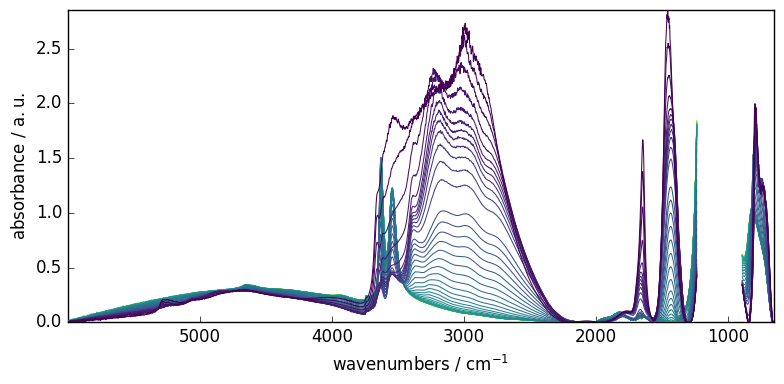

In [14]:
blc.model = "snip"
blc.snip_width = 200
blc.fit(X)
X7 = blc.transform()
X7.plot()

### Multivariate approach
In the previous example, we have fitted the model sequentially on all spectra.

Another useful approach is multivariate, where SVD/PCA or NMF is used to perform a dimensionality reduction into principal components (eignenvectors), followed by a model fitting on each of these components. This obviously require a 2D dataset, so it is not applicable to single spectra.

The 'multivariate' option is useful when the signal to noise ratio is low and/or when baseline changes in different regions of the spectrum are different regions of the spectrum are correlated. It consists of (i) modeling the baseline regions by a principal component analysis (PCA), (ii) interpolating the loadings of the first principal components over the whole spectrum and (iii) model the baselines of the spectra from the product of the PCA scores and the interpolated loadings. (For details: see Vilmin et al. Analytica Chimica Acta 891 (2015)).

If this option is selected, the user must also set the n_components parameter, i.e. the number of principal components used to model the baseline. In a sense, this parameter has the same role as the order parameter, except that it affects how the baseline fits the selected regions on both dimensions: wavelength and acquisition time. In particular, a large value of n_components will lead to an overfitting of the baseline variation with time and lead to the same result as the while a value that is too small may fail to detect a main component underlying the baseline variation over time. Typical optimal values are n_components=2 or n_components=3.

Let's demonstrate this on the previously used dataset.


<Matplotlib Axes object>

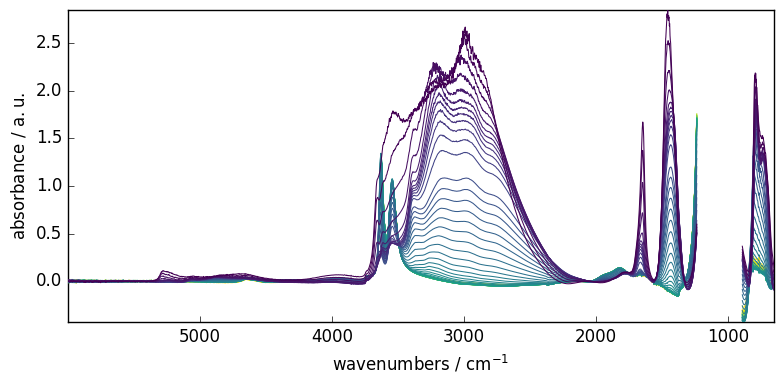

In [15]:
# set to multivariate (SVD by default)
blc.multivariate = True
# set the model
blc.model = "polynomial"
blc.order = 10
# Set the number of components
blc.n_components = 3
# Fit the model on X
blc.fit(X)
# get the corrected dataset
X8 = blc.transform()
# plot the result
X8.plot()

Finally, for all the example shown above, we have used the same instance of Baseline. It may be a problem to remember which setting has been done, and may impact new output. To know the actual status, one can use the `params` method. This will list all actual parameters.


In [16]:
blc.params()

{'asymmetry': 0.002,
 'include_limits': True,
 'lamb': 1000000000.0,
 'lls': True,
 'max_iter': 50,
 'model': 'polynomial',
 'multivariate': True,
 'n_components': 3,
 'order': 10,
 'ranges': [[np.float64(649.904), np.float64(651.832)],
  [840.0, 840.0],
  [1305.0, 1305.0],
  [1550.0, 1555.0],
  [2000.0, 2100.0],
  [3780.0, 3780.0],
  [4230.0, 4330.0],
  [4550.0, 4550.0],
  [5400.0, 5900.0],
  [np.float64(5997.627), np.float64(5999.556)]],
 'snip_width': 200,
 'tol': 0.001}

## Baseline correction using NDDataset or API methods

The `Baseline` processor is very flexible but it may be useful to use simpler way to compute baseline. This is the role of the methods
described below (which call the `Baseline` processor transparently).

As an example, we can now use a dataset consisting of 80 samples of corn measured on a NIR
spectrometer. This dataset (and others) can be loaded from http://www.eigenvector.com.

In [17]:
A = scp.read("http://www.eigenvector.com/data/Corn/corn.mat", merge=False)[4]

Add some label for a better reading of the data axis

In [18]:
A.title = "absorbance"
A.units = "a.u."
A.x.title = "Wavelength"
A.x.units = "nm"

Now plot the original dataset A:

<Matplotlib Axes object>

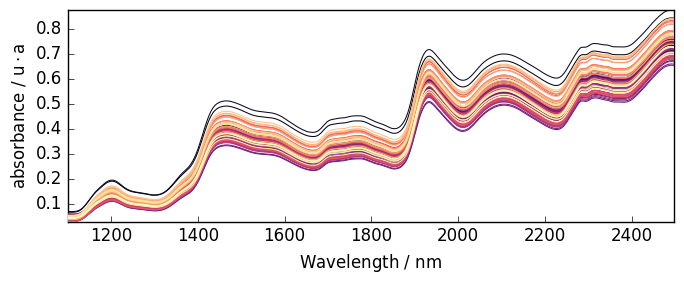

In [19]:
prefs = scp.preferences
prefs.figure.figsize = (7, 3)
prefs.colormap = "magma_r"
A.plot()

### Detrending

It is quite clear that this spectrum series has an increasing trend with both a
vertical shift and a drift.

The `detrend` method can help to remove such trends (Note that we did not talk about this before, but the model is also available in the`Baseline`processor:
`model='detrend'`)

#### Constant trend

When the trend is simply a shift one can subtract the mean absorbance to each spectrum.

<Matplotlib Axes object>

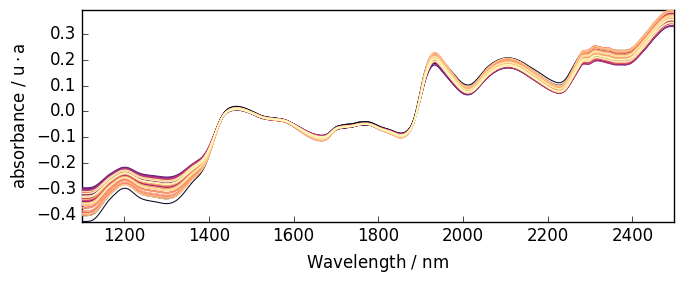

In [20]:
A1 = A.detrend(order="constant")  # Here we use a NDDataset method
A1.plot()

#### Linear trend
But here the trend is clearly closer to a linear trend. So we can use a linear correction
with `A.detrend(order="linear")` or simply `A.detrend()` as "linear" is the default.

<Matplotlib Axes object>

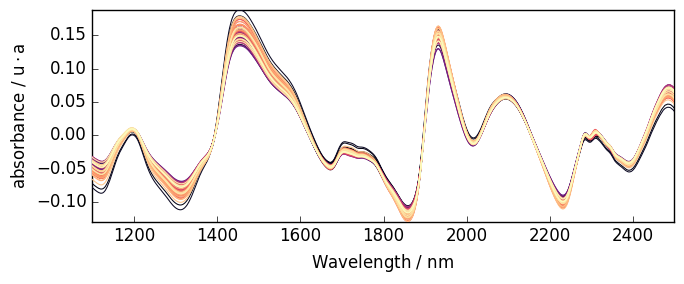

In [21]:
A2 = scp.detrend(
    A
)  # Here we use the API method (this is fully equivalent to the NDDataset method)
A2.plot()

#### Polynomial trend

If a higher degree of polynomial is necessary, it is possible to use a nonnegative integer scalar to define order (degree).
Note that for degree 2 and 3, the "quadratic" and "cubic" keywords are also available to define 2 and 3-degree of polynomial.

<Matplotlib Axes object>

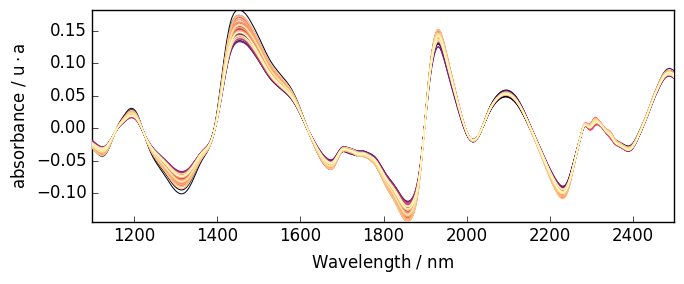

In [22]:
A3 = A.detrend(order="quadratic")  # one can also use `order=2`
A3.plot()

#### Detrend independently on several data segment

For this we must define a vector (`bp`) which contains the location of the break-points,
which determine the limits of each segments.

For example, let's try on a single spectrum for clarity:

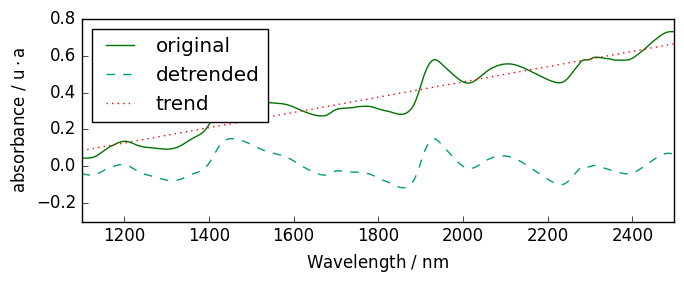

In [23]:
# without breakpoint
R = A[0]
R1 = R.detrend()

# plots
R.plot(label="original")
R1.plot(label="detrended", clear=False)
ax = (R - R1).plot(label="trend", clear=False, cmap=None, color="red", ls=":")
ax.legend(loc="upper left")
_ = ax.set_ylim([-0.3, 0.8])

<div class="alert alert-info">
<b>Note</b>

 we use float number to define breakpoint as coordinate.
 Integer number would mean that we use indice starting at 0 (not the same thing!).
 in this case, indice 1856 does not exist as the size of the x axis is 700.</div>

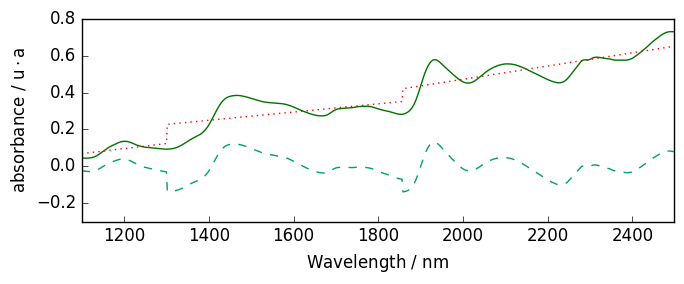

In [24]:
# with breakpoints
bp = [1300.0, 1856.0]  # warning must be float to set location, in int for indices
R2 = R.detrend(breakpoints=bp)
R.plot()
R2.plot(clear=False)
ax = (R - R2).plot(clear=False, cmap=None, color="red", ls=":")
_ = ax.set_ylim([-0.3, 0.8])

### basc
Make a baseline correction using the `Baseline` class.

Examples:

**Automatic linear baseline correction**

When the baseline to remove is a simple linear correction, one can use `basc` without
entering any parameter. This performs an automatic linear baseline correction.
This is close to detrend(oreder=1), exceot that the linear baseline is fitted on the
the spectra limit to fit the baseline. This is useful when the spectra limits are
signal free.

<Matplotlib Axes object>

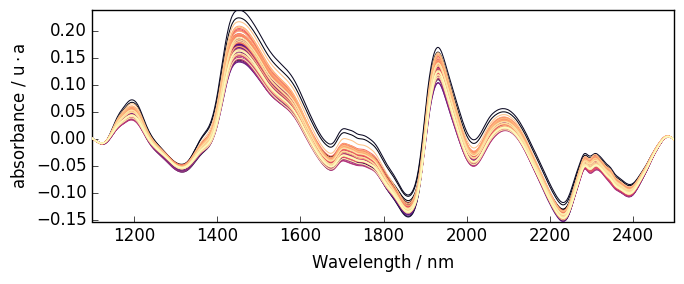

In [25]:
Aa = A.basc()
Aa.plot()  # range are automatically set to the start and end of the spectra, model='polynomial', order='linear'

All parameters of `Baseline` can be used in basc. It is thus probably quite conveninent if one wants to write shorter code.

### Rubberband

Method such as `ruberband`, `asls` and `snip` can be called directly.

Example:


<Matplotlib Axes object>

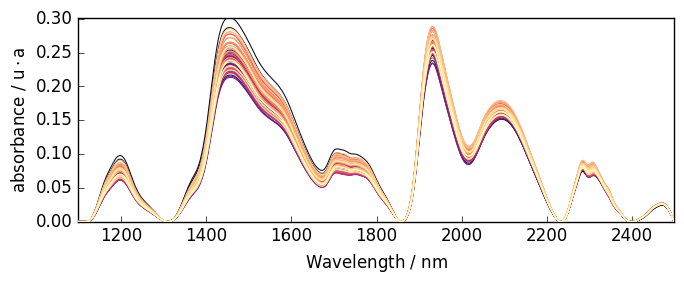

In [26]:
Ab = scp.rubberband(A)
Ab.plot()

### Code snippet for 'advanced' baseline correction
The following code in which the user can change any of the parameters and look at
the changes after re-running
the cell:

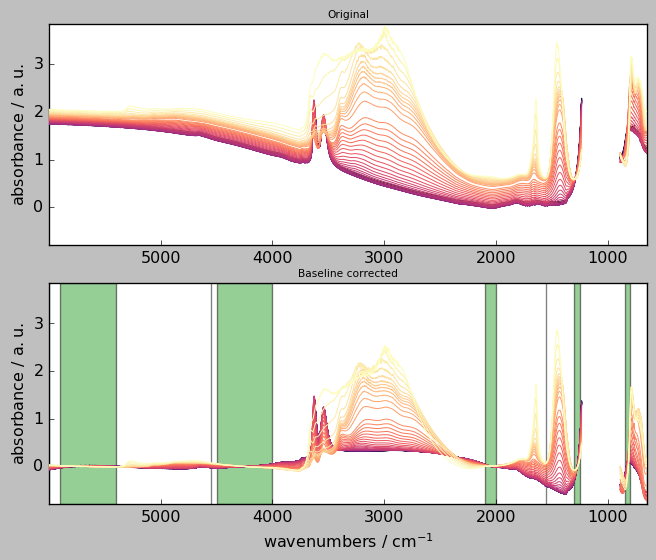

In [27]:
# Create a baseline instance and give it a name (here basc)
# ---------------------------------------------------------
basc = scp.Baseline()

# user defined parameters
# -----------------------
basc.ranges = (  # ranges can be pair or single values
    [5900.0, 5400.0],
    [4000.0, 4500.0],
    4550.0,
    [2100.0, 2000.0],
    [1550.0, 1555.0],
    [1250.0, 1300.0],
    [800.0, 850.0],
)
basc.interpolation = "pchip"  # choose 'polynomial' or 'pchip'
basc.order = 5  # only used for 'polynomial'
basc.method = "sequential"  # choose 'sequential' or 'multivariate'
basc.n_components = 3  # only used for 'multivariate'

# fit baseline, plot original and corrected NDDatasets and ranges
# ---------------------------------------------------------------
_ = basc.fit(X)
Xc = basc.corrected

axs = scp.multiplot(
    [X, Xc],
    labels=["Original", "Baseline corrected"],
    sharex=True,
    nrow=2,
    ncol=1,
    figsize=(7, 6),
    dpi=96,
)
basc.show_regions(axs["axe21"])

<div class='alert alert-info'>
    <b>Exercises</b>

**basic:**
- write commands to subtract (i) the first spectrum from a dataset and (ii)
the mean spectrum from a dataset
- write a code to correct the baseline of the last 10 spectra of the above dataset
in the 4000-3500 cm$^{-1}$ range

**intermediate:**
- what would be the parameters to use in 'advanced' baseline correction to mimic
'detrend' ? Write a code to check
your answer.

**advanced:**
- simulate noisy spectra with baseline drifts and compare the performances of
`multivariate` vs `sequential` methods
</div>